In [ ]:
import sys
sys.path.append("/cluster/home/terjenf/naplab/naplab")

In [9]:
from naplab_parser import NapLabParser

Print Parser


In [24]:
from naplab_parser.utils import f_theta_utils, timestamps_utils

In [34]:
raw_dataroot = "/cluster/home/terjenf/MapTR/NAP_raw_data" # path to raw naplab data
trip = "Trip083" # trip to generate dataset from
processed_dataroot = "/cluster/home/terjenf/naplab/data" # path to store processed data
nuscene_path = "/cluster/home/terjenf/naplab/naplab/naplab_parser/metadata_nuscenes/nuscene_metadata.json" # path to extracted intrinsics from nuscenes

selected_cams = [
    'C1_front60Single', 
    'C8_R2', 
    'C7_L2',
    'C4_rearCam', 
    'C6_L1',
    'C5_R1']

In [12]:
naplab_parser = NapLabParser(raw_dataroot=raw_dataroot, trip=trip, processed_dataroot=processed_dataroot, selected_cams=selected_cams, nuscnes_path=nuscene_path)


Counted 1719 timestamps in file /cluster/home/terjenf/MapTR/NAP_raw_data/Trip083/C1_front60Single.h264.timestamps
Counted 1720 timestamps in file /cluster/home/terjenf/MapTR/NAP_raw_data/Trip083/C4_rearCam.h264.timestamps
Counted 1721 timestamps in file /cluster/home/terjenf/MapTR/NAP_raw_data/Trip083/C5_R1.h264.timestamps
Counted 1722 timestamps in file /cluster/home/terjenf/MapTR/NAP_raw_data/Trip083/C6_L1.h264.timestamps
Counted 1722 timestamps in file /cluster/home/terjenf/MapTR/NAP_raw_data/Trip083/C7_L2.h264.timestamps
Counted 1720 timestamps in file /cluster/home/terjenf/MapTR/NAP_raw_data/Trip083/C8_R2.h264.timestamps
Read and extracted 574 lines of data
----------- Average Synce Diff To GNSS: 0.7368542013961605 seconds | Cam Start Index None | GNSS End Index None | ------------------
Starting Best Sync Calculations...
Updating start cams and end gnss timestamps...
Adjusting timestamps to new starts and end...
----------- Average Synce Diff To GNSS: 0.36560447259786477 seconds 

<Figure size 1000x1000 with 0 Axes>

### Visualizing Route

- Provide save=True, to save figures e.g. naplab_parser.visualize_route(save=True)
- Same for other visualizing methods. 

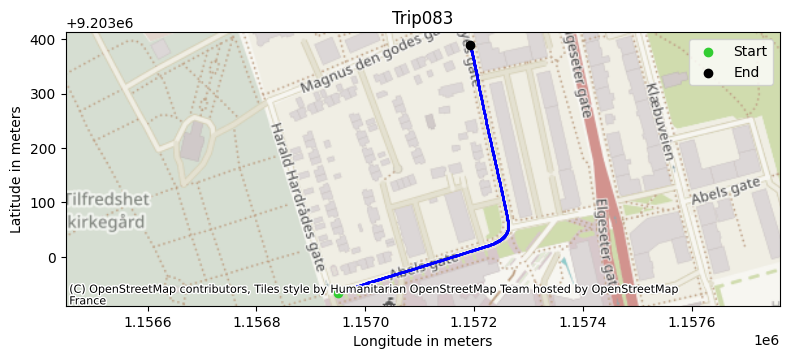

In [13]:
naplab_parser.visualize_route()

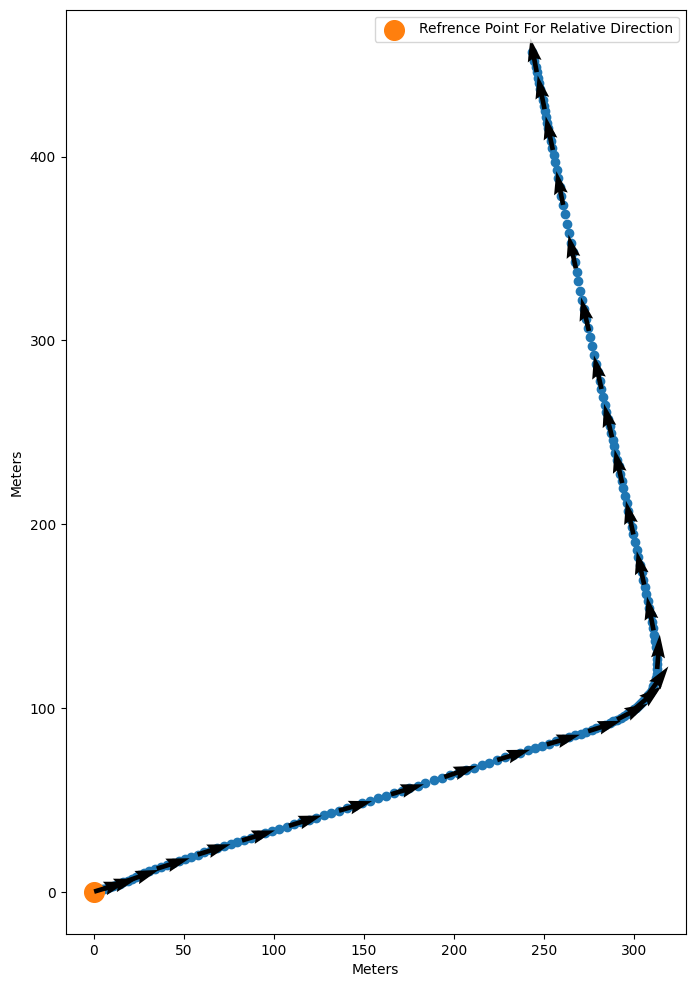

In [15]:
naplab_parser.visualize_route_bearings(refrence_frame=0)
# naplab_parser.visualize_route_bearings(refrence_frame=500, save=True) Set New Refrence point, save=True saves the plot

### Visualizing Scenes

By default 40 samples in one scene. 

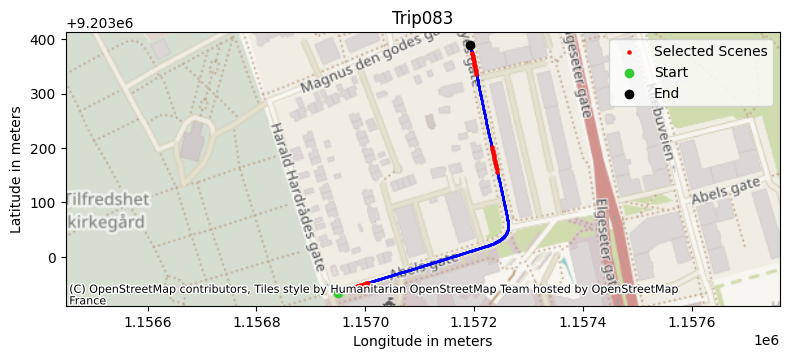

In [35]:
scenes_plot = [1, 10, 13] # secene nr 1,10 and 13
naplab_parser.visualize_route(scenes=scenes_plot) 

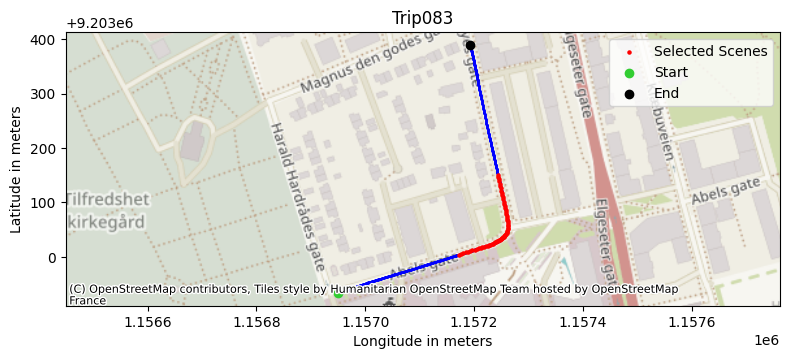

In [23]:
naplab_parser.visualize_route(scenes=(5,10))

### Visualize Forward Function


Two forward functions. First is more "sharp", mapping theta angles faster to longer distances to the principal point. Second is a "milder" and utilized in the database creation. 

In [26]:
bw_coeff = naplab_parser.camera_parameters['C1_front60Single']['bw_coeff']
w = naplab_parser.camera_parameters['C1_front60Single']['width']


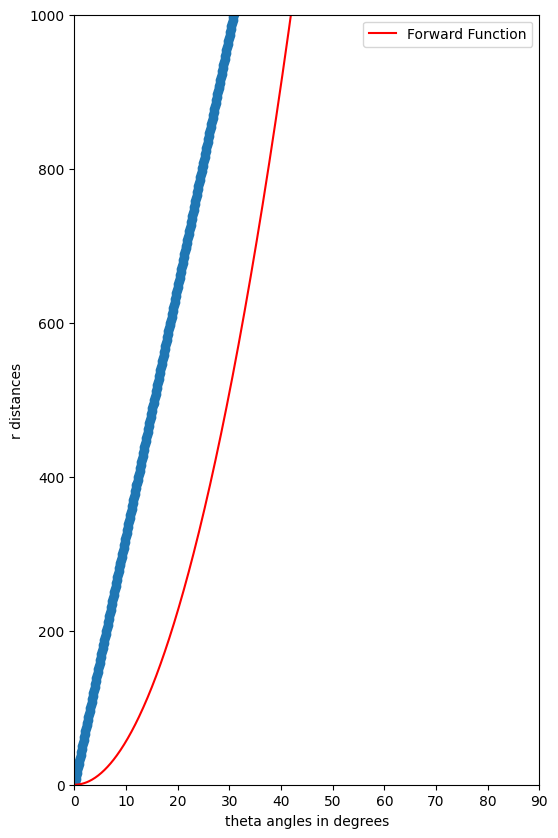

In [ ]:
# Estimated FW func
fw_coeff_list, thetas, r = f_theta_utils.get_fw_coeff_start_sigle_0(bw_coeff=bw_coeff, w=w, return_all=True)
f_theta_utils.plot_forward_only(fw_coeff_list, thetas, r, output_path=naplab_parser.processed_dataroot, cam_name="C1_front60Single")


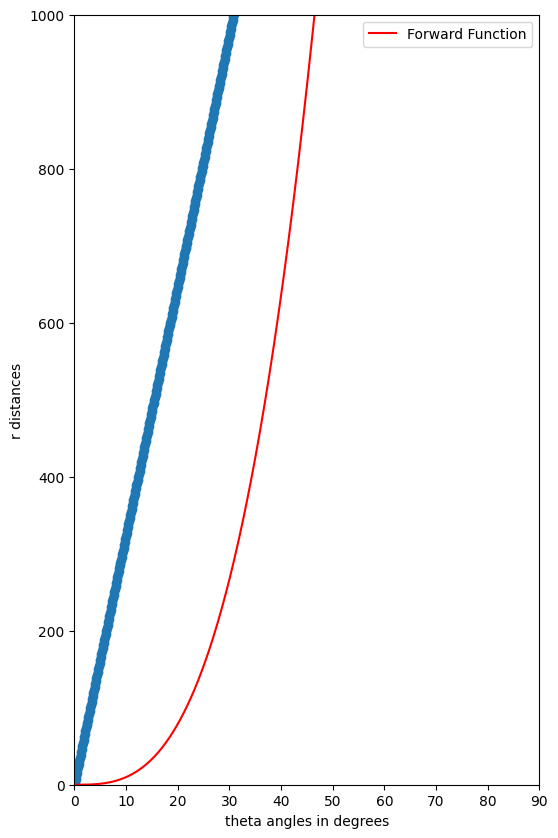

In [31]:
# Milder Forward func
fw_coeff_list, thetas, r = f_theta_utils.get_fw_coeff_start_0(bw_coeff=bw_coeff, w=w, return_all=True)
f_theta_utils.plot_forward_only(fw_coeff_list, thetas, r, output_path=naplab_parser.processed_dataroot, cam_name="C1_front60Single")


### Create Datasets Tables

In [32]:
description="Handelshøgskolen"
naplab_parser.create_database(description=description)

Saved to /cluster/home/terjenf/naplab/data/Trip083/tables/naplab_map.json
Saved to /cluster/home/terjenf/naplab/data/Trip083/tables/calibrated_sensors.json
Saved to /cluster/home/terjenf/naplab/data/Trip083/tables/ego_poses.json
Saved to /cluster/home/terjenf/naplab/data/Trip083/tables/scenes.json
Saved to /cluster/home/terjenf/naplab/data/Trip083/tables/samples.json
Saved to /cluster/home/terjenf/naplab/data/Trip083/tables/samples_data.json
Finished saving tables!


### Extract Images from Selected Scenes

To extract images from selected scenes

In [ ]:
#naplab_parser.extract_images(scenes=(5,10))